# Ejercicio 1

El objetivo de este ejercicio es que el alumno se familiarice con los algoritmos de clustering y analice, en base a la forma de los datasets, que algoritmos funcionan bajo ciertas circunstancias. Adicionalmente, que se entienda el objetivo de varios hyper-parámetros.

## Ejercicio 1.1

Ejecute y analice el siguiente código

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
def crear_dataset(d):
    x = d[0]
    y = d[1]
    
    return pd.DataFrame(np.column_stack([x, y]), columns=["x", "y", "cluster"])
    
    
N_SAMPLES = 100

# se crean semilunas y nubes de datos
noisy_moons = crear_dataset(datasets.make_moons(n_samples=N_SAMPLES, noise=.05))
blobs = crear_dataset(datasets.make_blobs(n_samples=N_SAMPLES, centers=4, random_state=4))

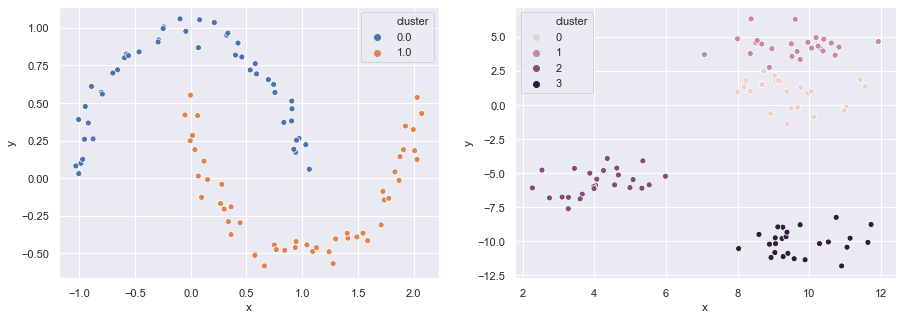

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x="x", y="y", data=noisy_moons, hue="cluster", ax=ax[0])
sns.scatterplot(x="x", y="y", data=blobs, hue="cluster", ax=ax[1])

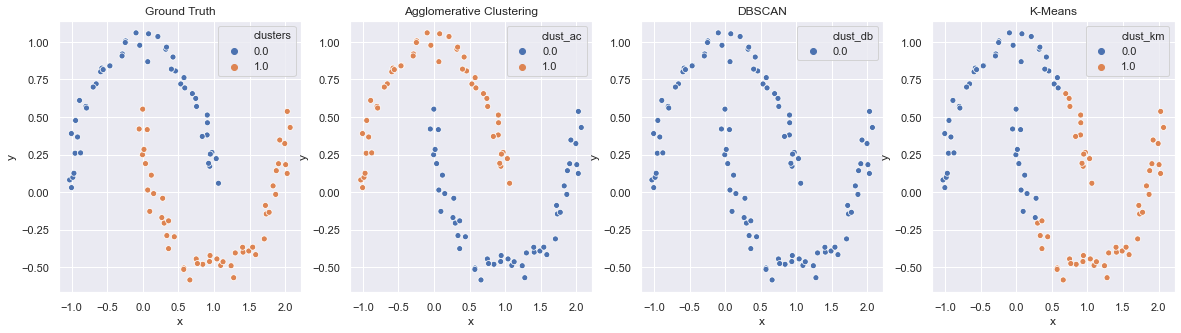

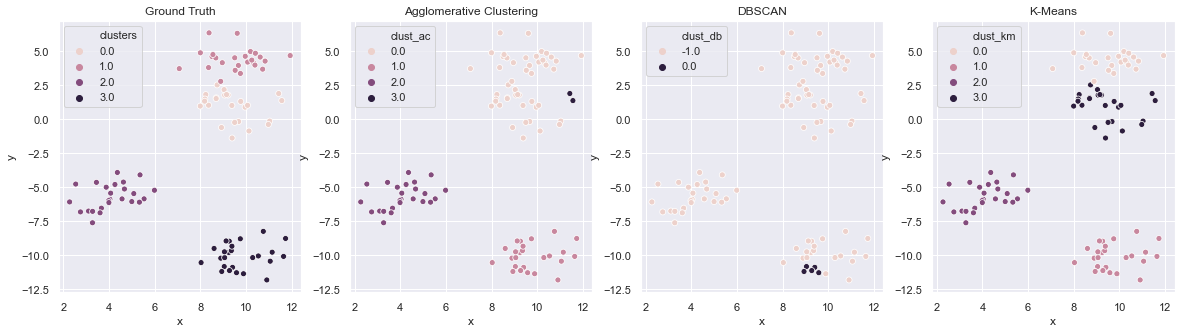

In [4]:
def mostrar_clusters(df):
    """Muestra los resultados de las distintas técnicas de clustering
    """
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    sns.scatterplot(x="x", y="y", data=df, hue="clusters", ax=ax[0], legend="full")
    ax[0].set_title('Ground Truth')
    sns.scatterplot(x="x", y="y", data=df, hue="clust_ac", ax=ax[1], legend="full")
    ax[1].set_title('Agglomerative Clustering')
    sns.scatterplot(x="x", y="y", data=df, hue="clust_db", ax=ax[2], legend="full")
    ax[2].set_title('DBSCAN')
    sns.scatterplot(x="x", y="y", data=df, hue="clust_km", ax=ax[3], legend="full")
    ax[3].set_title('K-Means')
    

def ejecutar_clustering(df, n_clusters):
    """Ejecuta técnicas de clustering y almacena los resultados
    """
    x = df[["x", "y"]].to_numpy()
    clusters = df.cluster.to_numpy()
    
    # agglomerative clustering
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single')
    ac.fit(x)
    clust_ac = ac.labels_

    # dbscan
    db = cluster.DBSCAN(metric='euclidean', eps=0.38)
    db.fit(x)
    clust_db = db.labels_

    # kmeans
    clust_km = cluster.k_means(x, n_clusters=n_clusters)[1]
    
    tmp_df = pd.DataFrame(np.column_stack([x, clusters, clust_ac, clust_db, clust_km]), 
                          columns=["x", "y", "clusters", "clust_ac", "clust_db", "clust_km"])
    
    mostrar_clusters(tmp_df)


n_clusters = [2, 4]
for i, dataset in enumerate([noisy_moons, blobs]):
    ejecutar_clustering(dataset, n_clusters=n_clusters[i])

## Ejercicio 1.2 

Modifique los hyper-parámetros. Para este ejercicio, el número de clusters ya fue dado como dato de entrada para los algoritmos. Modifique este valor y analice los resultados.  Además, modifique las métricas de distancia para los algoritmos y verifique los resultados.  Finalmente, en la técnica de Agglomerative Clustering, modifique el parámetro `linkage` por los siguientes valores: ward”, “complete”, “average”, “single”. ¿Que efecto tiene con la forma de los clusters?

## Ejercicio 1.3 

En base a los resultados previos:
    
- ¿Existe algún algoritmo de clustering que es superior a los otros?
- ¿Existe algún algoritmo que sea superior considerando los dos tipos de datos provistos: moons y clouds?

Para este ejercicio, un algoritmo se considera correcto si sus clusters se asemejan lo más posible al Ground Truth